In [1]:
# basic set of imports
import re, operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn.cross_validation import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

from IPython.display import display, HTML
import datetime, pickle
%matplotlib inline

In [2]:
# EXPEDIA DATA SET

# Getting Started With Kaggle



data_test  = pd.read_csv(r"..\expedia_data\test.csv")
print("test:  " , data_test.shape )

# data_full  = pd.concat([data_test, data_train])
# print("full:  " , data_full.shape )

data_destinations = pd.read_csv(r"..\expedia_data\destinations.csv")
print("destinations:  " , data_destinations.shape )


# data = data_test


# data = data_train


test:   (2528243, 22)
destinations:   (62106, 150)


In [50]:
#list(data_test.columns.values)
# data_test.dtypes

# data_test.dtypes  , data_test.dtypes
pd.DataFrame(data_test.dtypes, data_test.columns).to_dict()[0]
#d.DataFrame(data_test.columns)

{'channel': dtype('int64'),
 'date_time': dtype('O'),
 'hotel_continent': dtype('int64'),
 'hotel_country': dtype('int64'),
 'hotel_market': dtype('int64'),
 'id': dtype('int64'),
 'is_mobile': dtype('int64'),
 'is_package': dtype('int64'),
 'orig_destination_distance': dtype('float64'),
 'posa_continent': dtype('int64'),
 'site_name': dtype('int64'),
 'srch_adults_cnt': dtype('int64'),
 'srch_children_cnt': dtype('int64'),
 'srch_ci': dtype('O'),
 'srch_co': dtype('O'),
 'srch_destination_id': dtype('int64'),
 'srch_destination_type_id': dtype('int64'),
 'srch_rm_cnt': dtype('int64'),
 'user_id': dtype('int64'),
 'user_location_city': dtype('int64'),
 'user_location_country': dtype('int64'),
 'user_location_region': dtype('int64')}

In [51]:
train_dtypes = pd.DataFrame(data_test.dtypes, data_test.columns).to_dict()[0]


#train_dtypes["date_time"] = np.dtype('datetime64[ns]')
# train_dtypes["srch_ci"]   = np.dtype('datetime64[ns]')
# train_dtypes["srch_co"]   = np.dtype('datetime64[ns]')



with open('test_dtypes.pickle', 'wb') as handle:
  pickle.dump(train_dtypes, handle)

train_dtypes["hotel_cluster"] = np.dtype('int64')

with open('train_dtypes.pickle', 'wb') as handle:
  pickle.dump(train_dtypes, handle)

# np.dtype('datetime64[ns]')
# hotel_cluster

# np.dtype('datetime64[ns]')


In [46]:
test_dtypes

{'channel': dtype('int64'),
 'date_time': dtype('O'),
 'hotel_continent': dtype('int64'),
 'hotel_country': dtype('int64'),
 'hotel_market': dtype('int64'),
 'id': dtype('int64'),
 'is_mobile': dtype('int64'),
 'is_package': dtype('int64'),
 'orig_destination_distance': dtype('float64'),
 'posa_continent': dtype('int64'),
 'site_name': dtype('int64'),
 'srch_adults_cnt': dtype('int64'),
 'srch_children_cnt': dtype('int64'),
 'srch_ci': dtype('O'),
 'srch_co': dtype('O'),
 'srch_destination_id': dtype('int64'),
 'srch_destination_type_id': dtype('int64'),
 'srch_rm_cnt': dtype('int64'),
 'user_id': dtype('int64'),
 'user_location_city': dtype('int64'),
 'user_location_country': dtype('int64'),
 'user_location_region': dtype('int64')}

In [2]:
with open('train_dtypes.pickle', 'rb') as handle:
  train_dtypes = pickle.load(handle)

In [3]:
with open('test_dtypes.pickle', 'rb') as handle:
  test_dtypes = pickle.load(handle)

In [90]:
data_test.columns

Index(['id', 'date_time', 'site_name', 'posa_continent',
       'user_location_country', 'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'hotel_continent', 'hotel_country', 'hotel_market'],
      dtype='object')

In [81]:
train_dtypes = test_dtypes.copy()
train_dtypes["hotel_cluster"] = np.dtype('int16')
train_dtypes["is_booking"] = np.dtype('bool')
train_dtypes["cnt"] = np.dtype('int16')
train_dtypes

{'channel': dtype('int8'),
 'cnt': dtype('int16'),
 'date_time': dtype('O'),
 'hotel_cluster': dtype('int16'),
 'hotel_continent': dtype('int8'),
 'hotel_country': dtype('int16'),
 'hotel_market': dtype('int16'),
 'id': dtype('int32'),
 'is_booking': dtype('bool'),
 'is_mobile': dtype('bool'),
 'is_package': dtype('bool'),
 'orig_destination_distance': dtype('float64'),
 'posa_continent': dtype('int8'),
 'site_name': dtype('int8'),
 'srch_adults_cnt': dtype('int8'),
 'srch_children_cnt': dtype('int8'),
 'srch_ci': dtype('O'),
 'srch_co': dtype('O'),
 'srch_destination_id': dtype('int32'),
 'srch_destination_type_id': dtype('int8'),
 'srch_rm_cnt': dtype('int8'),
 'user_id': dtype('int32'),
 'user_location_city': dtype('int32'),
 'user_location_country': dtype('int16'),
 'user_location_region': dtype('int16')}

In [31]:
## How to get a dtype list with the lowest memory requirements?
## force error


for col in data_test.columns:

    a = all( data_test[ col ].dropna().astype(test_dtypes[col])==data_test[ col ].dropna() )
    print(col, test_dtypes[col], a)
    

id int32 True 0
date_time object True 0
site_name int8 True 0
posa_continent int8 True 0
user_location_country int16 True 0
user_location_region int16 True 0
user_location_city int32 True 0
orig_destination_distance float64 True 0
user_id int32 True 0
is_mobile bool True 0
is_package bool True 0
channel int8 True 0
srch_ci object True 0
srch_co object True 0
srch_adults_cnt int8 True 0
srch_children_cnt int8 True 0
srch_rm_cnt int8 True 0
srch_destination_id int32 True 0
srch_destination_type_id int8 True 0
hotel_continent int8 True 0
hotel_country int16 True 0
hotel_market int16 True 0


In [83]:
csv_chunks = pd.read_csv(r"..\expedia_data\train.csv", chunksize=50000 )
dtypes = train_dtypes
for chunk in csv_chunks:
#     print(chunk["cnt"])
#     print(chunk.columns.values)
    data_test=chunk
    for col in data_test.columns:
#         print(col, dtypes[col])
        a = all( data_test[ col ].dropna().astype(dtypes[col])==data_test[ col ].dropna() )
        if a==False:
            print(col, dtypes[col], a)
            print(chunk[col])
            raise ValueError('A very specific bad thing happened')

In [33]:
# no_datetime_errors_found = True

# import time
# start = time.clock()
num_types = ['bool', 'uint8', 'int8', 'uint16', 'int16', 'uint32', 'int32', 'uint64', 'int64','float32', 'float64','object']


dtypes_dict = dict()
# keys = col, values = (0 if type initially int64, 9 if type initially float64, 11 if type initially O)
init_type = {np.dtype('int64'):0,np.dtype('float64'):9,np.dtype('O'):11}

datetime_col_errors_dict = dict()

for dataset in ["test","train"]: #
    
    csv_chunks = pd.read_csv(r"..\expedia_data\{0}.csv".format(dataset), chunksize=50000 )

    count =0
    for chunk in csv_chunks:
        count +=1
        print("chunk: ",count)
        for col in chunk.columns:

            if col not in dtypes_dict.keys():
                dtypes_dict[col] = init_type[ chunk[col].dtype ]

            # float64 and int 64
            if chunk[col].dtype in [np.dtype('int64'),np.dtype('float64')]:
                a = False
                while(dtypes_dict[col]<11 and a==False):

                    a = all( chunk[ col ].dropna().astype( num_types[ dtypes_dict[col] ] )==chunk[ col ].dropna() )
                    if a==False:
                        dtypes_dict[col] += 1
            # object - all assumed to be datetime
            elif chunk[col].dtype == np.dtype('object'):
                
                
                # faster to go through the entire thing looking for issues ... or to try to convert
                try:
                    pd.to_datetime(chunk[col])
                except ValueError:
                    for el in chunk[col]:
                        try:
                            pd.to_datetime(el)
                        except ValueError:
                            # add value to DataFrame - id, col, value
    #                         if no_datetime_errors_found == True:
    #                             datetime_col_errors = pd.DataFrame( [el.index[0],col,el] )
    #                             datetime_col_errors.columns=('id','column','value')


    #                             no_datetime_errors_found = False:
    #                         else:
    #                             datetime_col_errors.loc[len(datetime_col_errors)] = [el.index[0],col,el]  

                            if col not in datetime_col_errors_dict.keys():
                                datetime_col_errors_dict[col] = [el]
                            else:
                                if el not in datetime_col_errors_dict[col]:
                                    datetime_col_errors_dict[col].append(el)

                    # now convert and coerce column
                    # nope - wrong time to do conversion!
                    # WARNING if <20% of dates work?
                 
                    
            else:
                raise ValueError('chunk[col] not equal to float64, int64, object')
                

# end = time.clock()
# print(end - start)


chunk:  1
chunk:  2
chunk:  3
chunk:  4
chunk:  5
chunk:  6
chunk:  7
chunk:  8
chunk:  9
chunk:  10
chunk:  11
chunk:  12
chunk:  13
chunk:  14
chunk:  15
chunk:  16
chunk:  17
chunk:  18
chunk:  19
chunk:  20
chunk:  21
chunk:  22
chunk:  23
chunk:  24
chunk:  25
chunk:  26
chunk:  27
chunk:  28
chunk:  29
chunk:  30
chunk:  31
chunk:  32
chunk:  33
chunk:  34
chunk:  35
chunk:  36
chunk:  37
chunk:  38
chunk:  39
chunk:  40
chunk:  41
chunk:  42
chunk:  43
chunk:  44
chunk:  45
chunk:  46
chunk:  47
chunk:  48
chunk:  49
chunk:  50
chunk:  51
chunk:  1
chunk:  2
chunk:  3
chunk:  4
chunk:  5
chunk:  6
chunk:  7
chunk:  8
chunk:  9
chunk:  10
chunk:  11
chunk:  12
chunk:  13
chunk:  14
chunk:  15
chunk:  16
chunk:  17
chunk:  18
chunk:  19
chunk:  20
chunk:  21
chunk:  22
chunk:  23
chunk:  24
chunk:  25
chunk:  26
chunk:  27
chunk:  28
chunk:  29
chunk:  30
chunk:  31
chunk:  32
chunk:  33
chunk:  34
chunk:  35
chunk:  36
chunk:  37
chunk:  38
chunk:  39
chunk:  40
chunk:  41
chunk:

In [39]:
list(datetime_col_errors_dict.values())

[['2557-08-17', '2557-04-07', '2558-03-16', '2557-11-15'],
 ['2161-10-00', '2557-08-15', '2557-04-06', '2558-03-15', '2557-11-14']]

In [34]:
datetime_col_errors_dict

{'srch_ci': ['2161-10-00',
  '2557-08-15',
  '2557-04-06',
  '2558-03-15',
  '2557-11-14'],
 'srch_co': ['2557-08-17', '2557-04-07', '2558-03-16', '2557-11-15']}

In [35]:
# both
dtypes_dict

{'channel': 1,
 'cnt': 3,
 'date_time': 11,
 'hotel_cluster': 1,
 'hotel_continent': 1,
 'hotel_country': 1,
 'hotel_market': 3,
 'id': 5,
 'is_booking': 0,
 'is_mobile': 0,
 'is_package': 0,
 'orig_destination_distance': 10,
 'posa_continent': 1,
 'site_name': 1,
 'srch_adults_cnt': 1,
 'srch_children_cnt': 1,
 'srch_ci': 11,
 'srch_co': 11,
 'srch_destination_id': 5,
 'srch_destination_type_id': 1,
 'srch_rm_cnt': 1,
 'user_id': 5,
 'user_location_city': 3,
 'user_location_country': 1,
 'user_location_region': 3}

In [127]:
# train
dtypes_dict

{'channel': 1,
 'cnt': 3,
 'date_time': 11,
 'hotel_cluster': 1,
 'hotel_continent': 1,
 'hotel_country': 1,
 'hotel_market': 3,
 'is_booking': 0,
 'is_mobile': 0,
 'is_package': 0,
 'orig_destination_distance': 10,
 'posa_continent': 1,
 'site_name': 1,
 'srch_adults_cnt': 1,
 'srch_children_cnt': 1,
 'srch_ci': 11,
 'srch_co': 11,
 'srch_destination_id': 3,
 'srch_destination_type_id': 1,
 'srch_rm_cnt': 1,
 'user_id': 5,
 'user_location_city': 3,
 'user_location_country': 1,
 'user_location_region': 3}

In [125]:
# test
dtypes_dict


{'channel': 1,
 'date_time': 11,
 'hotel_continent': 1,
 'hotel_country': 1,
 'hotel_market': 3,
 'id': 5,
 'is_mobile': 0,
 'is_package': 0,
 'orig_destination_distance': 10,
 'posa_continent': 1,
 'site_name': 1,
 'srch_adults_cnt': 1,
 'srch_children_cnt': 1,
 'srch_ci': 11,
 'srch_co': 11,
 'srch_destination_id': 5,
 'srch_destination_type_id': 1,
 'srch_rm_cnt': 1,
 'user_id': 5,
 'user_location_city': 3,
 'user_location_country': 1,
 'user_location_region': 3}

In [67]:
# train
# cnt, hotel_cluster, is_booking in train, but not in test
a =  ['date_time', 'site_name' ,'posa_continent', 'user_location_country',
 'user_location_region', 'user_location_city', 'orig_destination_distance',
 'user_id' ,'is_mobile' ,'is_package', 'channel', 'srch_ci', 'srch_co',
 'srch_adults_cnt' ,'srch_children_cnt', 'srch_rm_cnt' ,'srch_destination_id',
 'srch_destination_type_id', 'is_booking' ,'cnt', 'hotel_continent',
 'hotel_country' ,'hotel_market', 'hotel_cluster']

# test
# id in test, but not in train
b = ['id' ,'date_time', 'site_name', 'posa_continent', 'user_location_country',
 'user_location_region' ,'user_location_city', 'orig_destination_distance',
 'user_id', 'is_mobile', 'is_package' ,'channel' ,'srch_ci' ,'srch_co',
 'srch_adults_cnt' ,'srch_children_cnt', 'srch_rm_cnt' ,'srch_destination_id',
 'srch_destination_type_id' ,'hotel_continent', 'hotel_country',
 'hotel_market'] 

c = np.setdiff1d( b,a)
c

array(['id'], 
      dtype='<U25')

AttributeError: 'numpy.int8' object has no attribute 'asfloat'

In [15]:
data_test.memory_usage()

Index                              80
id                           20225944
date_time                    20225944
site_name                    20225944
posa_continent               20225944
user_location_country        20225944
user_location_region         20225944
user_location_city           20225944
orig_destination_distance    20225944
user_id                      20225944
is_mobile                    20225944
is_package                   20225944
channel                      20225944
srch_ci                      20225944
srch_co                      20225944
srch_adults_cnt              20225944
srch_children_cnt            20225944
srch_rm_cnt                  20225944
srch_destination_id          20225944
srch_destination_type_id     20225944
hotel_continent              20225944
hotel_country                20225944
hotel_market                 20225944
dtype: int64

In [16]:
data_test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528243 entries, 0 to 2528242
Data columns (total 22 columns):
id                           int64
date_time                    object
site_name                    int64
posa_continent               int64
user_location_country        int64
user_location_region         int64
user_location_city           int64
orig_destination_distance    float64
user_id                      int64
is_mobile                    int64
is_package                   int64
channel                      int64
srch_ci                      object
srch_co                      object
srch_adults_cnt              int64
srch_children_cnt            int64
srch_rm_cnt                  int64
srch_destination_id          int64
srch_destination_type_id     int64
hotel_continent              int64
hotel_country                int64
hotel_market                 int64
dtypes: float64(1), int64(18), object(3)
memory usage: 872.8 MB


In [23]:
test_dtypes = {'channel': np.dtype('int8'),
 'date_time': np.dtype('O'),
 'hotel_continent': np.dtype('int8'),
 'hotel_country': np.dtype('int16'),
 'hotel_market': np.dtype('int16'),
 'id': np.dtype('int32'),
 'is_mobile': np.dtype('bool'),
 'is_package': np.dtype('bool'),
 'orig_destination_distance': np.dtype('float64'),
 'posa_continent': np.dtype('int8'),
 'site_name': np.dtype('int8'),
 'srch_adults_cnt': np.dtype('int8'),
 'srch_children_cnt': np.dtype('int8'),
 'srch_ci': np.dtype('O'),
 'srch_co': np.dtype('O'),
 'srch_destination_id': np.dtype('int32'),
 'srch_destination_type_id': np.dtype('int8'),
 'srch_rm_cnt': np.dtype('int8'),
 'user_id': np.dtype('int32'),
 'user_location_city': np.dtype('int32'),
 'user_location_country': np.dtype('int16'),
 'user_location_region': np.dtype('int16')}

In [3]:
train_dtypes = test_dtypes
train_dtypes["hotel_cluster"] = np.dtype('int8')
train_dtypes

{'channel': dtype('int8'),
 'date_time': dtype('O'),
 'hotel_cluster': dtype('int8'),
 'hotel_continent': dtype('int8'),
 'hotel_country': dtype('int16'),
 'hotel_market': dtype('int16'),
 'id': dtype('int32'),
 'is_mobile': dtype('bool'),
 'is_package': dtype('bool'),
 'orig_destination_distance': dtype('float32'),
 'posa_continent': dtype('int8'),
 'site_name': dtype('int8'),
 'srch_adults_cnt': dtype('int8'),
 'srch_children_cnt': dtype('int8'),
 'srch_ci': dtype('O'),
 'srch_co': dtype('O'),
 'srch_destination_id': dtype('int32'),
 'srch_destination_type_id': dtype('int8'),
 'srch_rm_cnt': dtype('int8'),
 'user_id': dtype('int32'),
 'user_location_city': dtype('int32'),
 'user_location_country': dtype('int16'),
 'user_location_region': dtype('int16')}

In [102]:
# data_test = pd.read_csv(r"..\expedia_data\test.csv",
#                         dtype = test_dtypes,
#                         parse_dates = [1, 12, 13],
#                         infer_datetime_format = True,
#                         na_values = datetime_col_errors_dict)

In [46]:
dtypes_dict

{'channel': 1,
 'cnt': 3,
 'date_time': 11,
 'hotel_cluster': 1,
 'hotel_continent': 1,
 'hotel_country': 1,
 'hotel_market': 3,
 'id': 5,
 'is_booking': 0,
 'is_mobile': 0,
 'is_package': 0,
 'orig_destination_distance': 10,
 'posa_continent': 1,
 'site_name': 1,
 'srch_adults_cnt': 1,
 'srch_children_cnt': 1,
 'srch_ci': 11,
 'srch_co': 11,
 'srch_destination_id': 5,
 'srch_destination_type_id': 1,
 'srch_rm_cnt': 1,
 'user_id': 5,
 'user_location_city': 3,
 'user_location_country': 1,
 'user_location_region': 3}

['srch_ci', 'srch_co', 'date_time']

In [54]:
import time
start = time.clock()

started = False
count = 0

dtypes_dict_str = {key: num_types[value] for (key, value) in dtypes_dict.items()}

date_columns = [key for key, value in dtypes_dict_str.items() if value == 'object']

dataset = 'train'

csv_chunks = pd.read_csv(r"..\expedia_data\{0}.csv".format(dataset),
                         chunksize=500000,
                         dtype = dtypes_dict_str,
                         parse_dates= date_columns,
                         infer_datetime_format=True,
                         na_values= datetime_col_errors_dict)

for chunk in csv_chunks:
    print("chunk: ",count)    
    if count == 0:
        df=chunk
        #started=True
    elif count % 10==0:
        df.info(memory_usage='deep')
    else:

        df = df.append(chunk,verify_integrity=True, ignore_index=True)


    count = count + 1
    
# "date_time", "srch_ci", "srch_co"

#df = pd.concat(chunk for chunk in csv_chunks)

end = time.clock()
print(end - start)


chunk:  0
chunk:  1
chunk:  2
chunk:  3
chunk:  4
chunk:  5
chunk:  6
chunk:  7
chunk:  8
chunk:  9
chunk:  10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 24 columns):
date_time                    datetime64[ns]
site_name                    uint8
posa_continent               uint8
user_location_country        uint8
user_location_region         uint16
user_location_city           uint16
orig_destination_distance    float64
user_id                      uint32
is_mobile                    bool
is_package                   bool
channel                      uint8
srch_ci                      datetime64[ns]
srch_co                      datetime64[ns]
srch_adults_cnt              uint8
srch_children_cnt            uint8
srch_rm_cnt                  uint8
srch_destination_id          uint32
srch_destination_type_id     uint8
is_booking                   bool
cnt                          uint16
hotel_continent              uint8
hotel_coun

In [55]:
df["srch_adults_cnt"].value_counts()



2    22418604
1     7306006
3     1876514
4     1809149
6      305534
5      256272
8       79192
0       64649
7       40188
9       14185
Name: srch_adults_cnt, dtype: int64

In [56]:
import tables
df.to_hdf('train_as_hdf.h5','train',format='fixed',mode='w')

In [57]:
import tables
df.to_hdf('train_as_hdf_smaller.h5','train',format='fixed',mode='w', complevel=9,complib='bzip2')

In [58]:
df2 = pd.read_hdf('train_as_hdf.h5')
df2.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34170293 entries, 0 to 34170292
Data columns (total 24 columns):
date_time                    datetime64[ns]
site_name                    uint8
posa_continent               uint8
user_location_country        uint8
user_location_region         uint16
user_location_city           uint16
orig_destination_distance    float64
user_id                      uint32
is_mobile                    bool
is_package                   bool
channel                      uint8
srch_ci                      datetime64[ns]
srch_co                      datetime64[ns]
srch_adults_cnt              uint8
srch_children_cnt            uint8
srch_rm_cnt                  uint8
srch_destination_id          uint32
srch_destination_type_id     uint8
is_booking                   bool
cnt                          uint16
hotel_continent              uint8
hotel_country                uint8
hotel_market                 uint16
hotel_cluster                uint8
dtypes: bool(

In [59]:
df3 = pd.read_hdf('train_as_hdf_smaller.h5')
df3.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34170293 entries, 0 to 34170292
Data columns (total 24 columns):
date_time                    datetime64[ns]
site_name                    uint8
posa_continent               uint8
user_location_country        uint8
user_location_region         uint16
user_location_city           uint16
orig_destination_distance    float64
user_id                      uint32
is_mobile                    bool
is_package                   bool
channel                      uint8
srch_ci                      datetime64[ns]
srch_co                      datetime64[ns]
srch_adults_cnt              uint8
srch_children_cnt            uint8
srch_rm_cnt                  uint8
srch_destination_id          uint32
srch_destination_type_id     uint8
is_booking                   bool
cnt                          uint16
hotel_continent              uint8
hotel_country                uint8
hotel_market                 uint16
hotel_cluster                uint8
dtypes: bool(

In [88]:
data_test.describe()

C:\ANACON~1\envs\expedia_kaggle\lib\site-packages\numpy\lib\function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,id,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
count,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,1.680782e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06
mean,-4.999666e-01,9.709666e+00,2.697413e+00,3.849978e+01,-5.971136e+00,6.838196e+00,NaN,-4.763308e-01,1.425978e-01,1.093253e-01,6.493726e+00,1.958127e+00,2.507413e-01,1.117410e+00,1.716729e+01,2.941702e+00,3.022615e+00,2.954448e+01,-3.953348e+00
std,7.390047e+01,1.227183e+01,7.651288e-01,5.086846e+01,7.480050e+01,7.323689e+01,NaN,7.389067e+01,3.496623e-01,3.120470e-01,3.931422e+00,8.980415e-01,6.754566e-01,4.615010e-01,7.333662e+01,2.282006e+00,1.674879e+00,5.756813e+01,8.188926e+01
min,-1.280000e+02,0.000000e+00,0.000000e+00,-1.280000e+02,-1.280000e+02,-1.280000e+02,5.599976e-03,-1.280000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.280000e+02,1.000000e+00,0.000000e+00,-1.280000e+02,-1.280000e+02
25%,-6.500000e+01,2.000000e+00,3.000000e+00,3.000000e+00,-8.200000e+01,-5.100000e+01,NaN,-6.500000e+01,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-4.500000e+01,1.000000e+00,2.000000e+00,2.100000e+01,-8.200000e+01
50%,0.000000e+00,2.000000e+00,3.000000e+00,6.600000e+01,-7.000000e+00,7.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,3.800000e+01,1.000000e+00,2.000000e+00,5.000000e+01,-6.000000e+00
75%,6.400000e+01,1.300000e+01,3.000000e+00,6.600000e+01,6.500000e+01,7.100000e+01,NaN,6.400000e+01,0.000000e+00,0.000000e+00,1.000000e+01,2.000000e+00,0.000000e+00,1.000000e+00,7.800000e+01,6.000000e+00,4.000000e+00,5.000000e+01,7.400000e+01
max,1.270000e+02,5.300000e+01,4.000000e+00,1.270000e+02,1.270000e+02,1.270000e+02,1.220800e+04,1.270000e+02,1.000000e+00,1.000000e+00,1.000000e+01,9.000000e+00,9.000000e+00,8.000000e+00,1.270000e+02,9.000000e+00,6.000000e+00,1.270000e+02,1.270000e+02


In [52]:
#csv_chunks = pd.read_csv(r"..\expedia_data\train.csv", dtype = train_dtypes, skiprows = 1, iterator=True, chunksize = 10000)



#df = pd.concat(chunk for chunk in csv_chunks)

# data_train = pd.read_csv(r"..\expedia_data\train.csv",dtype = train_dtypes )
# print("train: " , data_train.shape )

# http://stackoverflow.com/questions/17557074/memory-error-when-using-pandas-read-csv

# data = data_train
store.close()

In [49]:

# parse_dates= list of ints or names. e.g. If [1, 2, 3] -> try parsing columns 1, 2, 3 each as a separate date column.
# infer_datetime_format : boolean, default False
# If True and parse_dates is enabled, pandas will attempt to infer the format of the datetime strings in the columns, 
# and if it can be inferred, switch to a faster method of parsing them. In some cases this can increase the parsing speed by ~5-10x.

# 12

import tables
store = pd.HDFStore('data_test.h5',mode='w')
for chunk in pd.read_csv(r"..\expedia_data\test.csv",chunksize=50000, dtype = test_dtypes, parse_dates= [1, 13], infer_datetime_format=True):
         store.append('df',chunk)
store.close()

In [53]:
store = pd.HDFStore('data_train.h5',mode='w')
for chunk in pd.read_csv(r"..\expedia_data\train.csv",chunksize=50000, dtype = train_dtypes, parse_dates= [1, 13], infer_datetime_format=True):
         store.append('df',chunk)
store.close()

In [94]:
# pd.read_hdf('data_test.h5')

In [50]:
# data_test  = pd.read_csv(r"..\expedia_data\test.csv", dtype = train_dtypes,)
# print("test:  " , data_test.shape )

In [3]:
data_destinations.describe()

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
count,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,...,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000
mean,32359.463884,-2.193903,-2.202854,-2.207391,-2.194040,-2.161497,-2.045110,-2.202433,-2.203207,-2.107808,...,-2.204092,-2.196919,-2.203262,-2.205128,-2.201925,-2.203332,-2.202989,-2.208359,-2.208269,-2.199470
std,18711.765765,0.038576,0.041065,0.040092,0.041406,0.066197,0.135803,0.038886,0.036578,0.197904,...,0.037164,0.059914,0.046520,0.039465,0.041603,0.038239,0.051552,0.038035,0.038569,0.042438
min,0.000000,-2.597617,-2.671613,-2.671613,-2.671613,-2.671613,-2.344165,-2.671613,-2.671613,-2.495544,...,-2.620769,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613
25%,16320.250000,-2.209336,-2.220192,-2.223679,-2.211437,-2.192158,-2.154267,-2.218745,-2.219086,-2.197704,...,-2.219630,-2.216147,-2.220347,-2.221893,-2.218394,-2.220500,-2.221748,-2.224618,-2.224290,-2.216428
50%,32277.500000,-2.185969,-2.193247,-2.195208,-2.188057,-2.178255,-2.088598,-2.192513,-2.192915,-2.177229,...,-2.192232,-2.190525,-2.192814,-2.194127,-2.191564,-2.192200,-2.193352,-2.196185,-2.195900,-2.190953
75%,48467.750000,-2.175309,-2.179261,-2.179990,-2.176763,-2.153317,-1.975940,-2.178976,-2.179164,-2.123598,...,-2.178093,-2.177777,-2.178996,-2.179475,-2.178335,-2.177590,-2.178927,-2.180602,-2.180380,-2.178088
max,64993.000000,-1.596004,-1.341325,-1.917826,-1.814585,-1.607558,-1.209058,-1.474441,-1.879678,-0.977219,...,-1.855317,-0.960356,-1.357408,-1.775218,-1.790435,-1.799341,-1.335962,-1.816892,-1.718778,-1.500309


In [4]:
data_test.describe()

C:\ANACON~1\envs\expedia_kaggle\lib\site-packages\numpy\lib\function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,id,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
count,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,1.680782e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06,2.528243e+06
mean,1.264121e+06,9.709666e+00,2.697413e+00,8.551612e+01,3.170341e+02,2.786218e+04,1.686398e+03,6.026459e+05,1.425978e-01,1.093253e-01,6.493726e+00,1.958127e+00,2.507413e-01,1.117410e+00,1.656862e+04,2.941702e+00,3.022615e+00,8.125454e+01,6.464926e+02
std,7.298410e+05,1.227183e+01,7.651288e-01,5.673880e+01,2.082834e+02,1.668788e+04,2.197361e+03,3.469651e+05,3.496623e-01,3.120470e-01,3.931422e+00,8.980415e-01,6.754566e-01,4.615010e-01,1.280502e+04,2.282006e+00,1.674879e+00,5.507528e+01,5.046530e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.600000e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.320605e+05,2.000000e+00,3.000000e+00,6.600000e+01,1.740000e+02,1.354200e+04,NaN,3.020785e+05,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,8.267000e+03,1.000000e+00,2.000000e+00,5.000000e+01,2.750000e+02
50%,1.264121e+06,2.000000e+00,3.000000e+00,6.600000e+01,3.180000e+02,2.765500e+04,NaN,6.041940e+05,0.000000e+00,0.000000e+00,9.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.201200e+04,1.000000e+00,2.000000e+00,5.000000e+01,6.280000e+02
75%,1.896182e+06,1.300000e+01,3.000000e+00,6.900000e+01,3.980000e+02,4.232800e+04,NaN,9.038295e+05,0.000000e+00,0.000000e+00,1.000000e+01,2.000000e+00,0.000000e+00,1.000000e+00,2.354100e+04,6.000000e+00,4.000000e+00,1.050000e+02,7.830000e+02
max,2.528242e+06,5.300000e+01,4.000000e+00,2.390000e+02,1.027000e+03,5.650900e+04,1.220623e+04,1.198785e+06,1.000000e+00,1.000000e+00,1.000000e+01,9.000000e+00,9.000000e+00,8.000000e+00,6.578000e+04,9.000000e+00,6.000000e+00,2.120000e+02,2.117000e+03


In [99]:
np.dtype('bool')

dtype('bool')

In [98]:
data_test.max()

id                                           127
date_time                    2015-12-31 23:58:47
site_name                                     53
posa_continent                                 4
user_location_country                        127
user_location_region                         127
user_location_city                           127
orig_destination_distance                  12208
user_id                                      127
is_mobile                                      1
is_package                                     1
channel                                       10
srch_ci                      2017-04-26 00:00:00
srch_co                      2017-04-30 00:00:00
srch_adults_cnt                                9
srch_children_cnt                              9
srch_rm_cnt                                    8
srch_destination_id                          127
srch_destination_type_id                       9
hotel_continent                                6
hotel_country       

In [97]:
data_test.min()

id                                          -128
date_time                    2015-01-08 00:00:35
site_name                                      0
posa_continent                                 0
user_location_country                       -128
user_location_region                        -128
user_location_city                          -128
orig_destination_distance             0.00559998
user_id                                     -128
is_mobile                                      0
is_package                                     0
channel                                        0
srch_ci                      2015-01-04 00:00:00
srch_co                      2015-01-08 00:00:00
srch_adults_cnt                                0
srch_children_cnt                              0
srch_rm_cnt                                    0
srch_destination_id                         -128
srch_destination_type_id                       1
hotel_continent                                0
hotel_country       

In [5]:
# convert to date_time format
for col in data.columns:
    if data[col].dtype == 'object':
        try:
            data[col] = pd.to_datetime(data[col])
        except ValueError as e:
            print(e)
            pass
        
data.dtypes

day is out of range for month


id                                    int64
date_time                    datetime64[ns]
site_name                             int64
posa_continent                        int64
user_location_country                 int64
user_location_region                  int64
user_location_city                    int64
orig_destination_distance           float64
user_id                               int64
is_mobile                             int64
is_package                            int64
channel                               int64
srch_ci                              object
srch_co                      datetime64[ns]
srch_adults_cnt                       int64
srch_children_cnt                     int64
srch_rm_cnt                           int64
srch_destination_id                   int64
srch_destination_type_id              int64
hotel_continent                       int64
hotel_country                         int64
hotel_market                          int64
dtype: object

In [6]:
for el in data["srch_ci"]:
    try:
        pd.to_datetime(el)
    except ValueError:
        print(el )
        display(data[data["srch_ci"]==el])
        pass

2161-10-00


,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
312920,312920,2015-09-27 12:17:51,13,1,46,244,33092,NaN,1041293,0,...,2161-10-00,2016-01-22,2,0,1,6387,1,6,170,1894


In [7]:
# BROKEN FORMAT ENTRY!

# 312920, 2161-10-00
#a = data[data.srch_ci == "2161-10-00"].srch_co - datetime.timedelta(2)

#data.srch_ci[data.srch_ci == "2161-10-00"] = data[data.srch_ci == "2161-10-00"].srch_co - datetime.timedelta(2)

#d.loc[d.sales == 12, 'sales'] = 99

data.loc[ data.id == 312920,"srch_ci"] = data.loc[data.id == 312920,"srch_co"] - datetime.timedelta(2)

#,[data.srch_ci == "2161-10-00"] ]
#a = (data.srch_ci == "2161-10-00")
# myseries[myseries == 7].index[0]
#list(a.values)
#[i for i, elem in enumerate([data.srch_ci == "2161-10-00"], 1) if elem]
#data.srch_ci.loc[312920]
                      
# a.c1[a.c1 == 8]

In [8]:
data.loc[ data.id == 312920,"srch_ci"]
# data.loc[data.id == 312920,"srch_co"]  - datetime.timedelta(2)

312920    1453248000000000000
Name: srch_ci, dtype: object

In [9]:
# convert to date_time format
for col in data.columns:
    if data[col].dtype == 'object':
        try:
            data[col] = pd.to_datetime(data[col])
        except ValueError as e:
            print(e)
            pass
        
data.dtypes

id                                    int64
date_time                    datetime64[ns]
site_name                             int64
posa_continent                        int64
user_location_country                 int64
user_location_region                  int64
user_location_city                    int64
orig_destination_distance           float64
user_id                               int64
is_mobile                             int64
is_package                            int64
channel                               int64
srch_ci                      datetime64[ns]
srch_co                      datetime64[ns]
srch_adults_cnt                       int64
srch_children_cnt                     int64
srch_rm_cnt                           int64
srch_destination_id                   int64
srch_destination_type_id              int64
hotel_continent                       int64
hotel_country                         int64
hotel_market                          int64
dtype: object

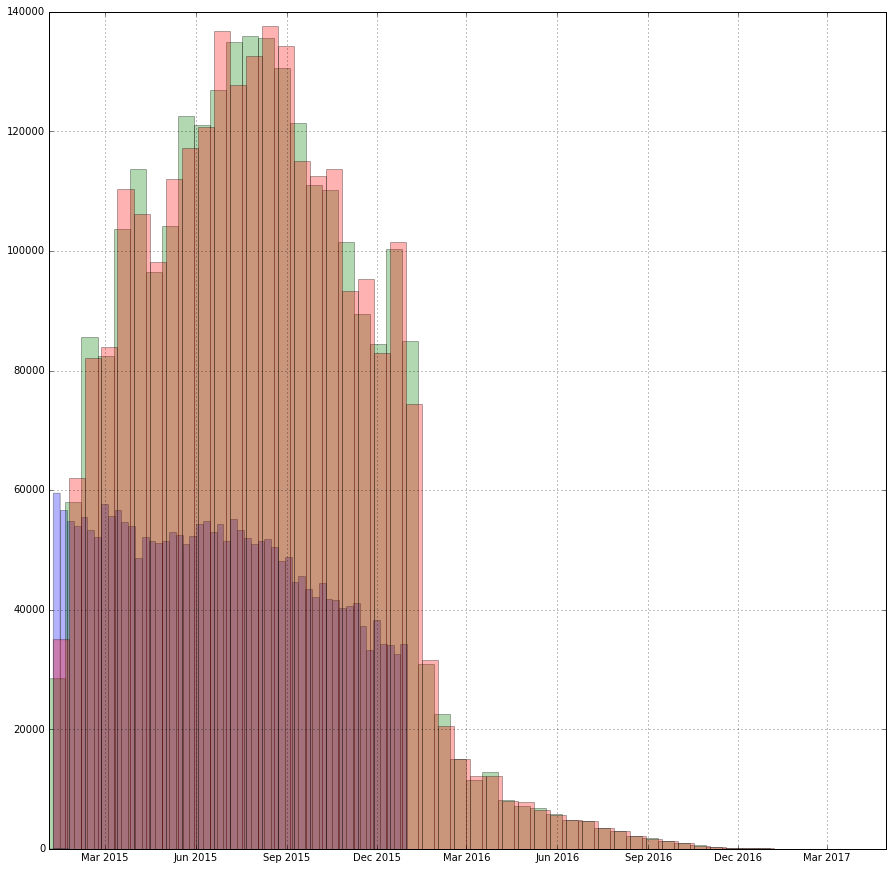

In [10]:
# visualise distribution in weeks-ish
data["date_time"].hist(bins=52,alpha=.3,figsize=(15,15))
# plt.hist(data["date_time"].values,bins=52,alpha=.3,label = "date_time")
# #plt.hist(data["srch_ci"].values,bins=52,alpha=.3,label = "srch_ci")
# #plt.hist(data["srch_co"].values,bins=52,alpha=.3,label = "srch_co")
data["srch_ci"].hist(bins=52,alpha=.3)
data["srch_co"].hist(bins=52,alpha=.3)
# plt.legend(loc='upper right')
# plt.show()

# data.loc[:,("date_time","srch_ci","srch_co")].hist()


In [11]:
a = np.median(data["srch_co"] - data["srch_ci"])
b = pd.DataFrame( ( data["srch_co"] - data["srch_ci"] )/np.timedelta64(1,'D') )
# data.loc[data.id == 312920,"srch_co"]
data.loc[data["srch_co"] - data["srch_ci"] > np.timedelta64(300,'D'),("srch_co","srch_ci")]

,srch_co,srch_ci
2910,2016-06-16,2015-08-16
736958,2016-06-11,2015-07-24
901146,2016-08-02,2015-07-31
1435906,2016-05-05,2015-01-04
1550812,2016-09-05,2015-08-31
1631969,2016-08-30,2015-09-19
1850351,2016-09-24,2015-09-20
2003063,2016-05-28,2015-06-27
2099089,2016-08-03,2015-08-01
2122432,2016-09-19,2015-10-28


In [83]:
data["date_time"].describe()

count                 2528243
unique                2399366
top       2015-05-01 12:14:44
freq                        4
first     2015-01-08 00:00:35
last      2015-12-31 23:58:47
Name: date_time, dtype: object

In [84]:
# MISSING VALUES IN "srch_co","srch_ci"
# comb[criteria.index[criteria]]

# c = b[0].isnull()

# c

# b.loc[c.index[c].values]

# data.loc[c.index[c].values]

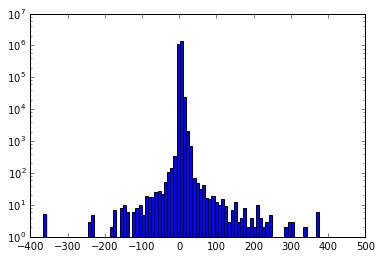

In [12]:
c = plt.hist(b.dropna(),bins=100, log=True )
#print(b.count(), len(b))

In [13]:
# np.is_busday():

In [ ]:
# column types?
# id : id (continuous, complete, full integer series starting at 0) 0 - 2528242
# date_time : date,time format {'2015-01-08 00:00:35' - '2015-12-31 23:58:47'}
# 

In [ ]:
# Column_exploration process
# (1) .describe() (only for numeric)
# nunique/count -> north of 20%, quantitative; south of 205, categorical
# categorical -> unordered/ordinal?

In [41]:
data_test[data_test.columns[13]]

# [1, 12,13]

0          2016-05-23
1          2016-05-15
2          2015-07-27
3          2015-09-16
4          2015-07-23
5          2015-07-24
6          2015-08-03
7          2015-08-04
8          2015-12-31
9          2016-01-03
10         2016-01-06
11         2015-08-21
12         2015-06-08
13         2015-06-26
14         2015-08-04
15         2015-08-09
16         2015-08-19
17         2015-08-09
18         2015-08-20
19         2015-08-31
20         2015-09-03
21         2015-09-13
22         2015-11-29
23         2015-10-18
24         2016-02-01
25         2015-11-29
26         2015-08-24
27         2015-06-14
28         2015-12-22
29         2015-05-04
              ...    
2528213    2015-06-30
2528214    2015-08-18
2528215    2015-07-27
2528216    2015-08-15
2528217    2015-08-09
2528218    2015-10-29
2528219    2015-10-02
2528220    2015-10-03
2528221    2015-10-02
2528222    2015-11-11
2528223    2015-11-09
2528224    2015-06-07
2528225    2015-09-09
2528226    2015-12-27
2528227   

In [85]:
nunique = data.apply(pd.Series.nunique)
missing = len(data) - data.count()
a = pd.concat( [ missing, pd.DataFrame( 100 * missing / len(data) ), data.dtypes, nunique, pd.DataFrame( 100*nunique/(len(data) - missing) ) ] ,axis=1 )
a.columns = ["No Miss. Values", "% Miss. Values", "type", "No Uniq. Values", "% Uniq. Values"]
a

,No Miss. Values,% Miss. Values,type,No Uniq. Values,% Uniq. Values
id,0,0.000000,int64,2528243,100.000000
date_time,0,0.000000,datetime64[ns],2399366,94.902507
site_name,0,0.000000,int64,53,0.002096
posa_continent,0,0.000000,int64,5,0.000198
user_location_country,0,0.000000,int64,236,0.009335
user_location_region,0,0.000000,int64,988,0.039079
user_location_city,0,0.000000,int64,36722,1.452471
orig_destination_distance,847461,33.519761,float64,1344826,80.011923
user_id,0,0.000000,int64,1181577,46.735104
is_mobile,0,0.000000,int64,2,0.000079


In [36]:
# data.replace('-999999', np.nan,  inplace=True)
# data.replace('9999999999', np.nan,  inplace=True)
print(data.shape)
# Missing Values (NaNs), 

unique_value_nums = []

descr = pd.concat( [pd.DataFrame( len(data) - data.count() ), pd.DataFrame( 100*( len(data) - data.count() )/len(data) ) ,
                    data.apply(pd.Series.nunique).to_frame() ).to_frame(), data.dtypes.to_frame() ],axis=1 )
descr.columns = ["Missing Values?","How many unique values","Column data types"]
print(descr)

for col in data.columns:
    num_unique = pd.Series.nunique(data[col])
    unique_value_nums.append(num_unique)
    if num_unique<=10:
        print( '{0!s:10s} {1!s:20s}'.format( col, (dict(data[col].value_counts())) ) )
    elif data[col].dtype=="int64" or data[col].dtype=="float64":
        print( '{0!s:10s} {1!s:20s}'.format( col, {k:round(float(v),2) for k,v in data[col].describe().to_dict().items()} ) )
    else:
        print( '{0!s:10s} {1!s:20s}'.format( col, "lots of text") )

(2528243, 22)


TypeError: unsupported operand type(s) for *: 'int' and 'function'

In [41]:
data.apply(pd.Series.nunique)

id                           2528243
date_time                    2399366
site_name                         53
posa_continent                     5
user_location_country            236
user_location_region             988
user_location_city             36722
orig_destination_distance    1344826
user_id                      1181577
is_mobile                          2
is_package                         2
channel                           11
srch_ci                          778
srch_co                          772
srch_adults_cnt                   10
srch_children_cnt                 10
srch_rm_cnt                        9
srch_destination_id            40718
srch_destination_type_id           8
hotel_continent                    7
hotel_country                    206
hotel_market                    2115
dtype: int64

In [ ]:
# Submission format (sample_submission.csv)
# ~million id -> hotel cluster

In [ ]:
# Destination (destination.csv)
# 150 columns (1x id='srch_destination_id' and 149x 'd1'-'d149')
# srch_destination_id 0-64993, 62016 rows